<a href="https://colab.research.google.com/github/dinu191811/Stress-Detection/blob/main/Human_Stress_Prediction_Based_on_Sleeping_Habits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Human Stress Prediction Based on Sleep Habits Using Machine Learning**

The primary objective of this project is to develop robust machine learning models capable of accurately predicting stress levels based on comprehensive sleep analysis. By leveraging a diverse array of sleep parameters, including snoring rate, respiration rate, body temperature, limb movement, blood oxygen, eye movement, sleeping hours, and heart rate, the project aims to capture the complex interplay between sleep quality and stress dynamics. Through the integration of advanced machine learning techniques, such as Random Forest, Support Vector Machine (SVM), and Decision Trees, the project seeks to harness the predictive power of these algorithms to provide valuable insights into individuals' stress levels and facilitate personalized stress management strategies. In addition to predictive accuracy, the project aims to evaluate the interpretability and generalization ability of the developed machine learning models. By examining the feature importance and decision boundaries generated by each algorithm, the project seeks to elucidate the underlying relationships between sleep parameters and stress levels. This holistic approach not only enhances our understanding of the intricate connections between sleep quality and stress but also enables the identification of key biomarkers and risk factors contributing to stress susceptibility. Through rigorous testing and validation procedures, the project endeavors to ensure the reliability and robustness of the developed models across diverse populations and sleep conditions. Ultimately, the project aspires to contribute to the advancement of sleep medicine and the development of innovative solutions for stress management in today's fast-paced society.

# **Importing libraries and models**

Importing all necessary python libraries and setting up a classification task using machine learning models like Random Forest, Support Vector Machine (SVM), and Decision Tree.

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_recall_curve, auc
import warnings
warnings.filterwarnings('ignore')

# **Uploading the Data set**

In [ ]:
# Step 1: Data Preprocessing
# Loading the csv dataset
data = pd.read_csv('/content/SaYoPillow.csv')

# EDA(Exploratory Data Analysis)

In [ ]:
#First 5 rows of the dataset
data.head(5)

,sr,rr,t,lm,bo,rem,sr.1,hr,sl
0,93.80,25.680,91.840,16.600,89.840,99.60,1.840,74.20,3
1,91.64,25.104,91.552,15.880,89.552,98.88,1.552,72.76,3
2,60.00,20.000,96.000,10.000,95.000,85.00,7.000,60.00,1
3,85.76,23.536,90.768,13.920,88.768,96.92,0.768,68.84,3
4,48.12,17.248,97.872,6.496,96.248,72.48,8.248,53.12,0


In [ ]:
#Last 5 rows of the dataset
data.tail(5)

,sr,rr,t,lm,bo,rem,sr.1,hr,sl
625,69.600,20.960,92.960,10.960,90.960,89.80,3.440,62.40,2
626,48.440,17.376,98.064,6.752,96.376,73.76,8.376,53.44,0
627,97.504,27.504,86.880,17.752,84.256,101.88,0.000,78.76,4
628,58.640,19.728,95.728,9.728,94.592,84.32,6.728,59.32,1
629,73.920,21.392,93.392,11.392,91.392,91.96,4.088,63.48,2


**Renaming the attributes**

In [ ]:
#Renaming the attributes
data.rename(columns={'sr': 'snoring rate', 'rr':'respiration rate', 't': 'body temperature', 'lm':'limb movement',
                            'bo':'blood oxygen', 'rem':'eye movement', 'sr.1':'sleeping hours', 'hr':'heart rate',
                            'sl':'stress level'}, inplace=True)
data.columns

Index(['snoring rate', 'respiration rate', 'body temperature', 'limb movement',
       'blood oxygen', 'eye movement', 'sleeping hours', 'heart rate',
       'stress level'],
      dtype='object')

**Type of data**

In [ ]:
#Finding the type of data
data.dtypes

snoring rate        float64
respiration rate    float64
body temperature    float64
limb movement       float64
blood oxygen        float64
eye movement        float64
sleeping hours      float64
heart rate          float64
stress level          int64
dtype: object

**Finding the Duplicates**

In [ ]:
#Finding the Duplicates for the dataset
duplicate_rows_df = data[data.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (0, 9)


**Finding the Null values**

In [ ]:
#finding the null values
print(data.isnull().sum())

snoring rate        0
respiration rate    0
body temperature    0
limb movement       0
blood oxygen        0
eye movement        0
sleeping hours      0
heart rate          0
stress level        0
dtype: int64


**Box PLot for the Data set**

<Axes: xlabel='snoring rate'>

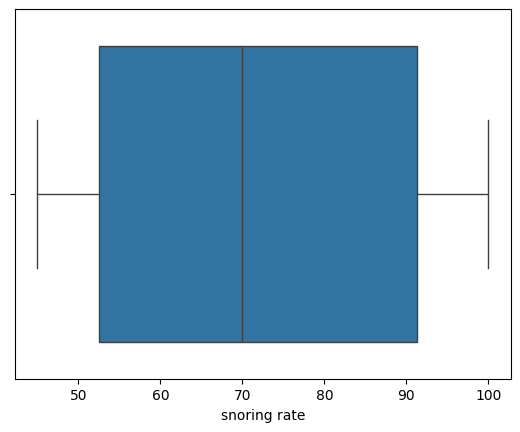

In [ ]:
#ploting boxplot for finding out outliers
sns.boxplot(x=data['snoring rate'])

<Axes: xlabel='respiration rate'>

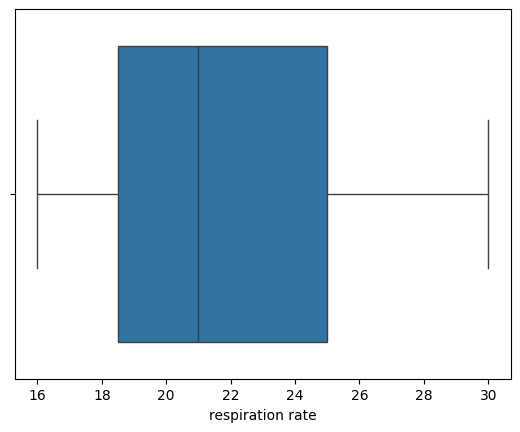

In [ ]:
sns.boxplot(x=data['respiration rate'])

<Axes: xlabel='body temperature'>

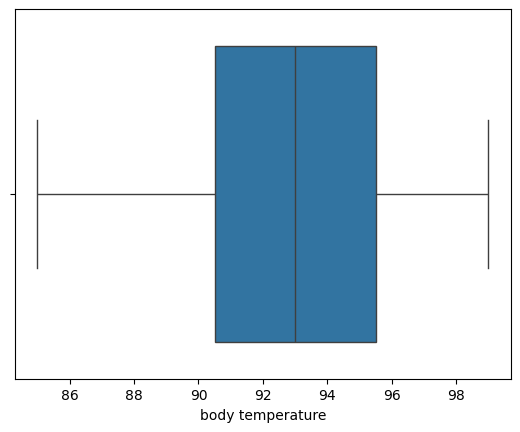

In [ ]:
sns.boxplot(x=data['body temperature'])

**IQR(Inter-quartile range)**

In [ ]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

snoring rate        38.75
respiration rate     6.50
body temperature     5.00
limb movement        7.25
blood oxygen         5.75
eye movement        17.50
sleeping hours       6.00
heart rate          16.25
stress level         2.00
dtype: float64


**Information on data**

Getting the basic information of data like Non-null count, Type of data

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 630 entries, 0 to 629
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   snoring rate      630 non-null    float64
 1   respiration rate  630 non-null    float64
 2   body temperature  630 non-null    float64
 3   limb movement     630 non-null    float64
 4   blood oxygen      630 non-null    float64
 5   eye movement      630 non-null    float64
 6   sleeping hours    630 non-null    float64
 7   heart rate        630 non-null    float64
 8   stress level      630 non-null    int64  
dtypes: float64(8), int64(1)
memory usage: 44.4 KB


**Describing Data**

Describing the Data by finding mean, Standard Deviation, Minimum, Maximum, and percentage of all columns

In [ ]:
#Descrbing the data
data.describe()

,snoring rate,respiration rate,body temperature,limb movement,blood oxygen,eye movement,sleeping hours,heart rate,stress level
count,630.000000,630.000000,630.00000,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000
mean,71.600000,21.800000,92.80000,11.700000,90.900000,88.500000,3.700000,64.500000,2.000000
std,19.372833,3.966111,3.52969,4.299629,3.902483,11.893747,3.054572,9.915277,1.415337
min,45.000000,16.000000,85.00000,4.000000,82.000000,60.000000,0.000000,50.000000,0.000000
25%,52.500000,18.500000,90.50000,8.500000,88.500000,81.250000,0.500000,56.250000,1.000000
50%,70.000000,21.000000,93.00000,11.000000,91.000000,90.000000,3.500000,62.500000,2.000000
75%,91.250000,25.000000,95.50000,15.750000,94.250000,98.750000,6.500000,72.500000,3.000000
max,100.000000,30.000000,99.00000,19.000000,97.000000,105.000000,9.000000,85.000000,4.000000


**Target Variable**

In [ ]:
data['stress level'].value_counts()

3    126
1    126
0    126
2    126
4    126
Name: stress level, dtype: int64

# Data Visualization

**Hist plot**

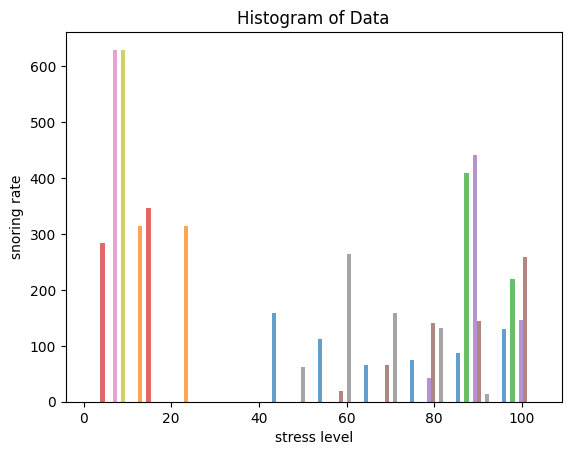

In [ ]:
plt.hist(data, bins=10, alpha=0.7)
plt.xlabel('stress level')
plt.ylabel('snoring rate')
plt.title('Histogram of Data')
plt.show()

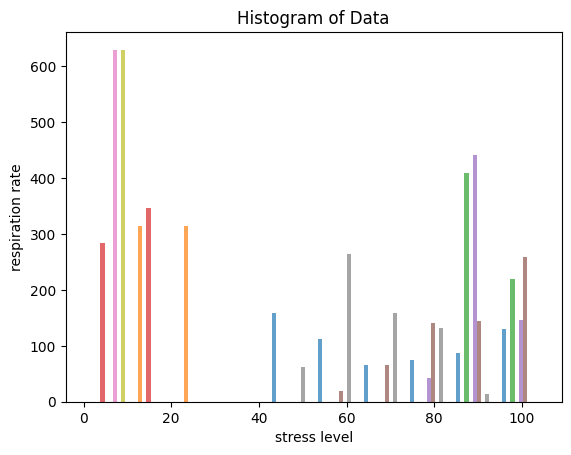

In [ ]:
plt.hist(data, bins=10, alpha=0.7)
plt.xlabel('stress level')
plt.ylabel('respiration rate')
plt.title('Histogram of Data')
plt.show()

**Scatter Plot**

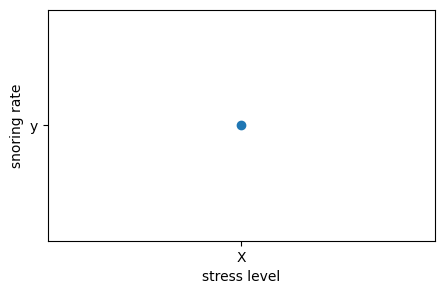

In [ ]:
X = data[['snoring rate', 'respiration rate','body temperature','limb movement','blood oxygen','eye movement','sleeping hours','heart rate']]
y = data['stress level']
fig, ax = plt.subplots(figsize=(5,3))
ax.scatter('X','y')
ax.set_xlabel('stress level')
ax.set_ylabel('snoring rate')
plt.show()

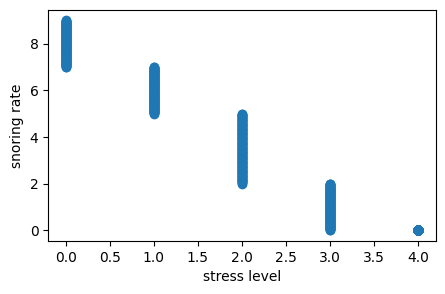

In [ ]:

fig, ax = plt.subplots(figsize=(5,3))
ax.scatter(data['stress level'], data['sleeping hours'])
ax.set_xlabel('stress level')
ax.set_ylabel('snoring rate')
plt.show()

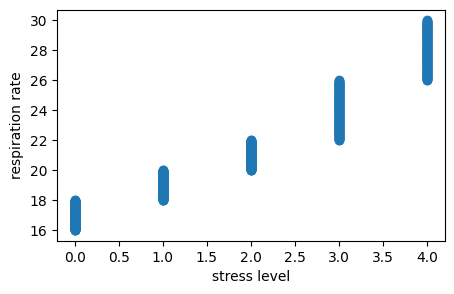

In [ ]:
fig, ax = plt.subplots(figsize=(5,3))
ax.scatter(data['stress level'], data['respiration rate'])
ax.set_xlabel('stress level')
ax.set_ylabel('respiration rate')
plt.show()

**Line PLot**

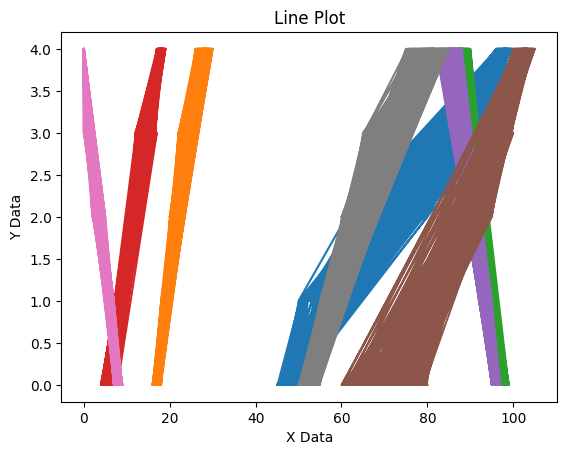

In [ ]:
X = data[['snoring rate', 'respiration rate','body temperature','limb movement','blood oxygen','eye movement','sleeping hours','heart rate']]
y = data['stress level']
plt.plot(X,y)
plt.xlabel('X Data')
plt.ylabel('Y Data')
plt.title('Line Plot')
plt.show()

Box plot

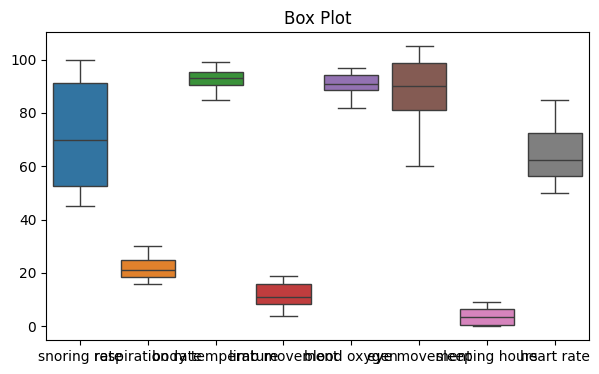

In [ ]:
import seaborn as sns

# Plot a box plot
plt.figure(figsize=(7,4))
sns.boxplot(X)
plt.title('Box Plot')
plt.show()

**Heat map**

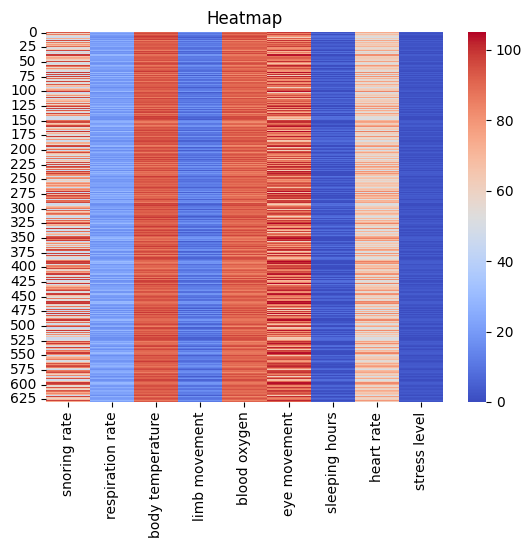

In [ ]:
sns.heatmap(data, cmap='coolwarm')
plt.title('Heatmap')
plt.show()

# **Min-Max Scaling**

Performing Min-Max scaling function from "mlxtend.preprocessing" to scale the data.This function scales the features to a specified range, typically between 0 and 1.

In [ ]:
#Min-Max scaling function from "mlxtend.preprocessing" to scale the data
from mlxtend.preprocessing import minmax_scaling

X = data.drop('stress level', axis=1)
y = pd.DataFrame(data['stress level'])

X_scaled = minmax_scaling(X, columns=X.columns)

# **Feature Selection**

Performing feature selection using mutual information regression and correlation analysis to identify the most relevant features for predicting the target variable 'stress level'.

  **Mutual Information Regression:**You're calculating the mutual information scores between each feature and the target variable 'stress level' using the mutual_info_regression function from sklearn.feature_selection.

  **Correlation Analysis:** You're calculating the Pearson correlation and Spearman correlation between each feature and the target variable 'stress level' using the corrwith method.

  **Combining Results:** You're combining the mutual information scores, Pearson correlation, and Spearman correlation into a single DataFrame.

  **Sorting Features:**Finally, you're sorting the features based on mutual information scores in descending order to identify the most relevant features.

In [ ]:
# feature selection using mutual information regression and correlation analysis to identify the most relevant features for predicting the target variable 'stress level'.
from sklearn.feature_selection import mutual_info_regression

mi = pd.DataFrame(mutual_info_regression(X_scaled, y), columns=['MI Scores'], index=X_scaled.columns)
corr = pd.DataFrame(X_scaled[X_scaled.columns].corrwith(y['stress level']), columns=['Correlation'])
s_corr = pd.DataFrame(X_scaled[X_scaled.columns].corrwith(y['stress level'], method='spearman'),
                      columns=['Spearman_Correlation'])

relation = mi.join(corr)
relation = relation.join(s_corr)
relation.sort_values(by='MI Scores', ascending=False)

,MI Scores,Correlation,Spearman_Correlation
snoring rate,1.599239,0.975322,0.979788
heart rate,1.595773,0.963516,0.979785
blood oxygen,1.594355,-0.961092,-0.979785
respiration rate,1.594309,0.963516,0.979785
eye movement,1.592755,0.951988,0.979785
body temperature,1.592027,-0.962354,-0.979785
limb movement,1.591686,0.971071,0.979785
sleeping hours,1.568407,-0.973036,-0.983435


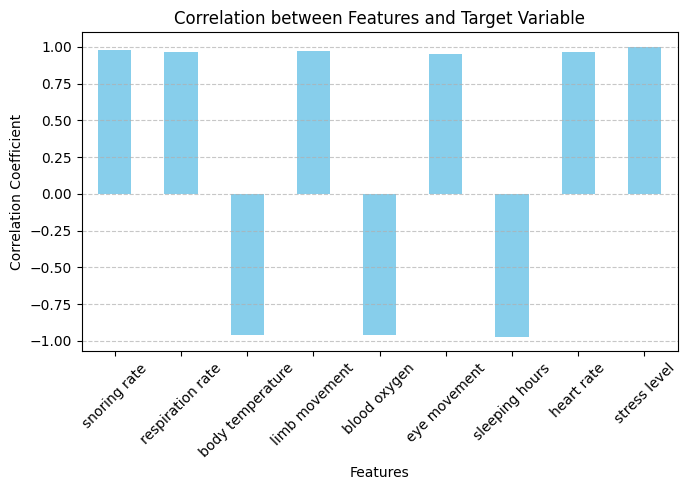

In [ ]:
correlation = data.corrwith(data['stress level'])

# Plot correlation coefficients
plt.figure(figsize=(7,5))
correlation.plot(kind='bar', color='skyblue')
plt.title('Correlation between Features and Target Variable')
plt.xlabel('Features')
plt.ylabel('Correlation Coefficient')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

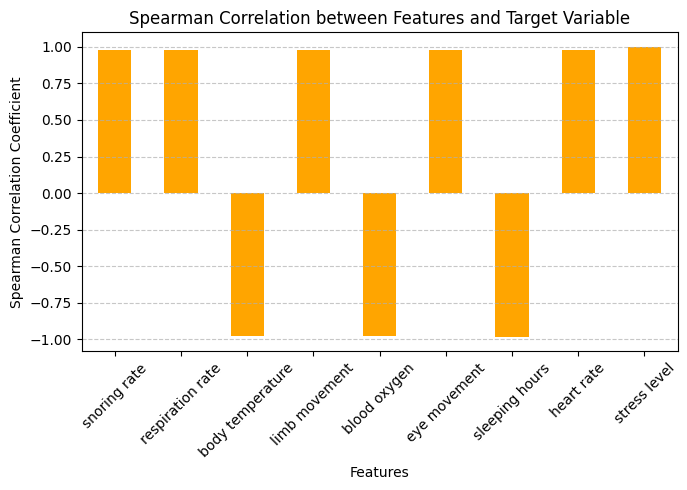

In [ ]:
spearman_corr = data.corr(method='spearman')['stress level']

# Plot Spearman correlation coefficients
plt.figure(figsize=(7,5))
spearman_corr.plot(kind='bar', color='orange')
plt.title('Spearman Correlation between Features and Target Variable')
plt.xlabel('Features')
plt.ylabel('Spearman Correlation Coefficient')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Spliting the data into Train and Test Data

Splitting your dataset into training and testing sets using the train_test_split function from sklearn.model_selection.

  **X:** Your feature DataFrame.
  
  **y:** Your target variable DataFrame.
  
  **test_size:** This parameter determines the proportion of the dataset to include in the test split. Here, it's set to 0.2, meaning 20% of the data will be used for testing.
  
  **random_state:** This parameter sets the random seed for reproducibility. It ensures that each time you run the code, you'll get the same random split. Setting it to a specific value (e.g., 42) ensures consistency across runs.

In [ ]:
#Splitting your dataset into training and testing sets using the train_test_split function from sklearn.model_selection.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training the Model

Training a Random Forest Classifier model using the training data and then defines a function predict_stress_level() to take user input for feature values and predict the stress level using the trained model.

**Training the Model:** You instantiate a Random Forest Classifier model and fit it to the training data.

**User Input and Prediction Function:** You define a function predict_stress_level() that prompts the user to input values for each feature and then predicts the stress level based on these inputs using the trained model.

**Prediction:** You call the predict_stress_level() function with the trained model as an argument to make predictions based on user input.

In [ ]:
# Train your model (Random Forest, SVM, Decision Tree - Choose one)
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Function to take user input and predict stress level
def predict_stress_level(model):
    user_input = []
    print("Please provide the following information:")
    for feature in X.columns:
        value = float(input(f"Enter value for {feature}: "))
        user_input.append(value)

    user_input = np.array(user_input).reshape(1, -1)
    stress_level = model.predict(user_input)
    print(f"\nThe predicted stress level is: {stress_level[0]}")

# Predict stress level based on user input
predict_stress_level(model)

Please provide the following information:
Enter value for snoring rate: 95
Enter value for respiration rate: 23
Enter value for body temperature: 91
Enter value for limb movement: 10
Enter value for blood oxygen: 92
Enter value for eye movement: 80
Enter value for sleeping hours: 5
Enter value for heart rate: 99

The predicted stress level is: 2


**Inference:**
If the Stress Level is:

*   0 - No stess
*   1 - Low stress
*   2 - moderate stress
*   3 - high stress
*   4 - very High


# **Comparing the Models**

Comparing their performance on a test dataset. You're using the classification_report() function from sklearn.metrics to evaluate the precision, recall, F1-score, and support for each class in your classification task.

In [ ]:
# Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

# Support Vector Machine (SVM)
svm_model = SVC()
svm_model.fit(X_train, y_train)

# Decision Trees
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

# Step 4: Model Evaluation
# Random Forest
rf_pred = rf_model.predict(X_test)
print("Random Forest Classification Report:")
print(classification_report(y_test, rf_pred))

# SVM
svm_pred = svm_model.predict(X_test)
print("\nSVM Classification Report:")
print(classification_report(y_test, svm_pred))

# Decision Trees
dt_pred = dt_model.predict(X_test)
print("\nDecision Trees Classification Report:")
print(classification_report(y_test, dt_pred))

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        24
           2       1.00      1.00      1.00        28
           3       1.00      0.96      0.98        26
           4       0.96      1.00      0.98        25

    accuracy                           0.99       126
   macro avg       0.99      0.99      0.99       126
weighted avg       0.99      0.99      0.99       126


SVM Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        23
           1       0.92      1.00      0.96        24
           2       1.00      0.96      0.98        28
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        25

    accuracy                           0.98       126
   macro avg       0.98      0.98      0.98       126
weighted avg

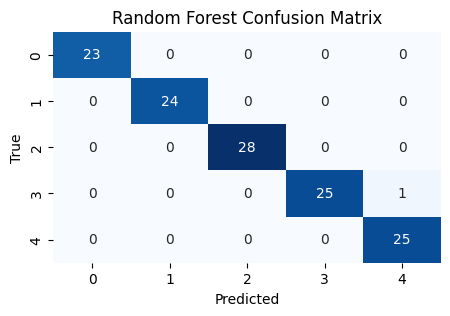

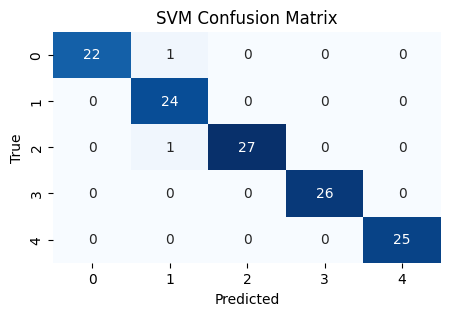

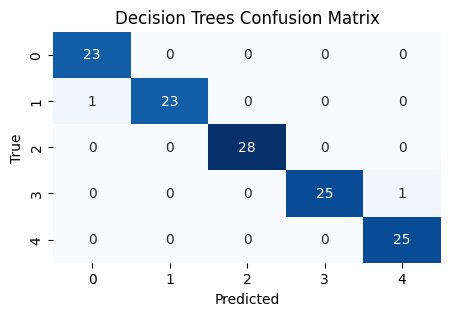

In [ ]:
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5, 3))
    sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", cbar=False)
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

# Confusion matrix for Random Forest
plot_confusion_matrix(y_test, rf_pred, title="Random Forest Confusion Matrix")

# Confusion matrix for SVM
plot_confusion_matrix(y_test, svm_pred, title="SVM Confusion Matrix")

# Confusion matrix for Decision Trees
plot_confusion_matrix(y_test, dt_pred, title="Decision Trees Confusion Matrix")

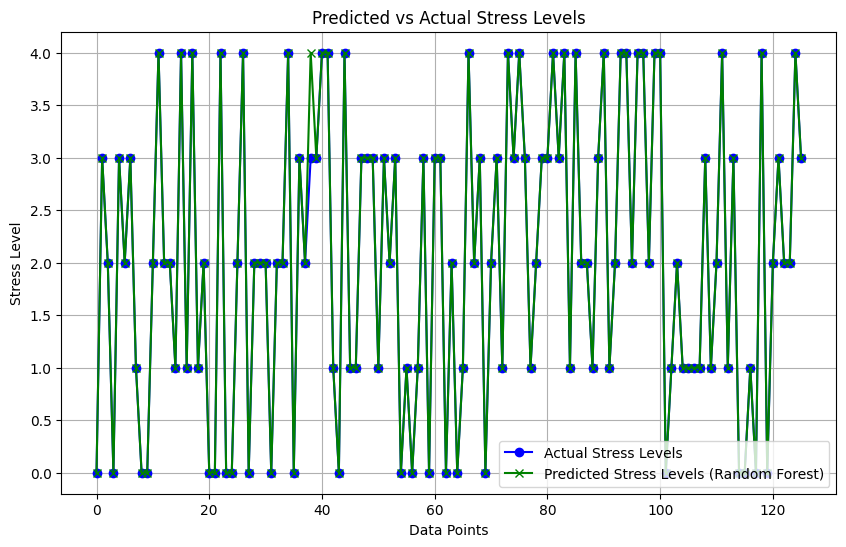

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual Stress Levels', color='blue', marker='o')
plt.plot(rf_pred, label='Predicted Stress Levels (Random Forest)', color='green', marker='x')
plt.xlabel('Data Points')
plt.ylabel('Stress Level')
plt.title('Predicted vs Actual Stress Levels')
plt.legend()
plt.grid(True)
plt.show()

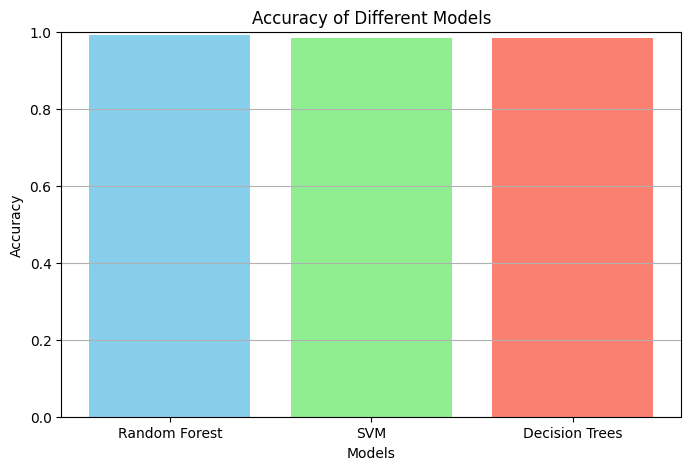

In [ ]:
models = ['Random Forest', 'SVM', 'Decision Trees']
accuracies = [rf_model.score(X_test, y_test), svm_model.score(X_test, y_test), dt_model.score(X_test, y_test)]

plt.figure(figsize=(8, 5))
plt.bar(models, accuracies, color=['skyblue', 'lightgreen', 'salmon'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Models')
plt.ylim(0, 1)  # Limit y-axis to 0-1 for accuracy
plt.grid(axis='y')
plt.show()